In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 18.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [ ]:
!gdown 18N3tesWa6EaMOC-ZRh6NB3-avC8nvfgx
!unzip yolo.zip

Downloading...
From (original): https://drive.google.com/uc?id=18N3tesWa6EaMOC-ZRh6NB3-avC8nvfgx
From (redirected): https://drive.google.com/uc?id=18N3tesWa6EaMOC-ZRh6NB3-avC8nvfgx&confirm=t&uuid=75df1ab8-850d-4123-b94e-07695c6efe1c
To: /content/yolo.zip
100% 184M/184M [00:02<00:00, 88.9MB/s]
Archive:  yolo.zip
   creating: yolo/
   creating: yolo/detect/
  inflating: yolo/detect/data.yaml   
   creating: yolo/detect/images/
   creating: yolo/detect/images/test/
  inflating: yolo/detect/images/test/IMG0000142.jpg  
  inflating: yolo/detect/images/test/IMG0000207.jpg  
  inflating: yolo/detect/images/test/IMG0000454.jpg  
  inflating: yolo/detect/images/test/IMG0000480.jpg  
  inflating: yolo/detect/images/test/IMG0000671.jpg  
  inflating: yolo/detect/images/test/IMG0000776.jpg  
  inflating: yolo/detect/images/test/IMG0000777.jpg  
  inflating: yolo/detect/images/test/IMG0000805.jpg  
  inflating: yolo/detect/images/test/IMG0000845.jpg  
  inflating: yolo/detect/images/test/IMG0001362

## DETECT

### Training Yolov9c detection


In [ ]:
!yolo task=detect mode=train model=yolov9c.pt data= /content/yolo/detect/data.yaml epochs=50 imgsz=640

100% 49.4M/49.4M [00:00<00:00, 336MB/s]
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/yolo/detect/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

### Validate on val dataset

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/last.pt' data=/content/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs
val: Scanning /content/yolo/detect/labels/val.cache... 86 images, 0 backgrounds, 0 corrupt: 100% 86/86 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83% 5/6 [00:04<00:00,  1.25it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:05<00:00,  1.19it/s]
                   all         86        101      0.742      0.446      0.495      0.195
Speed: 4.4ms pre

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data=/content/yolo/detect/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs
val: Scanning /content/yolo/detect/labels/val.cache... 86 images, 0 backgrounds, 0 corrupt: 100% 86/86 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  83% 5/6 [00:05<00:01,  1.09s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.00s/it]
                   all         86        101      0.606      0.455      0.504        0.2
Speed: 9.9ms pre


### Inference on test dataset

In [ ]:
!yolo task=detect mode=predict save=True model='/content/runs/detect/train/weights/best.pt' conf=0.25 source="/content/yolo/detect/images/test"

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/58 /content/yolo/detect/images/test/IMG0000142.jpg: 640x512 (no detections), 126.5ms
image 2/58 /content/yolo/detect/images/test/IMG0000207.jpg: 640x512 2 fractureds, 36.6ms
image 3/58 /content/yolo/detect/images/test/IMG0000454.jpg: 640x544 (no detections), 142.2ms
image 4/58 /content/yolo/detect/images/test/IMG0000480.jpg: 640x544 1 fractured, 46.2ms
image 5/58 /content/yolo/detect/images/test/IMG0000671.jpg: 640x544 1 fractured, 42.1ms
image 6/58 /content/

### Plot results on test dataset

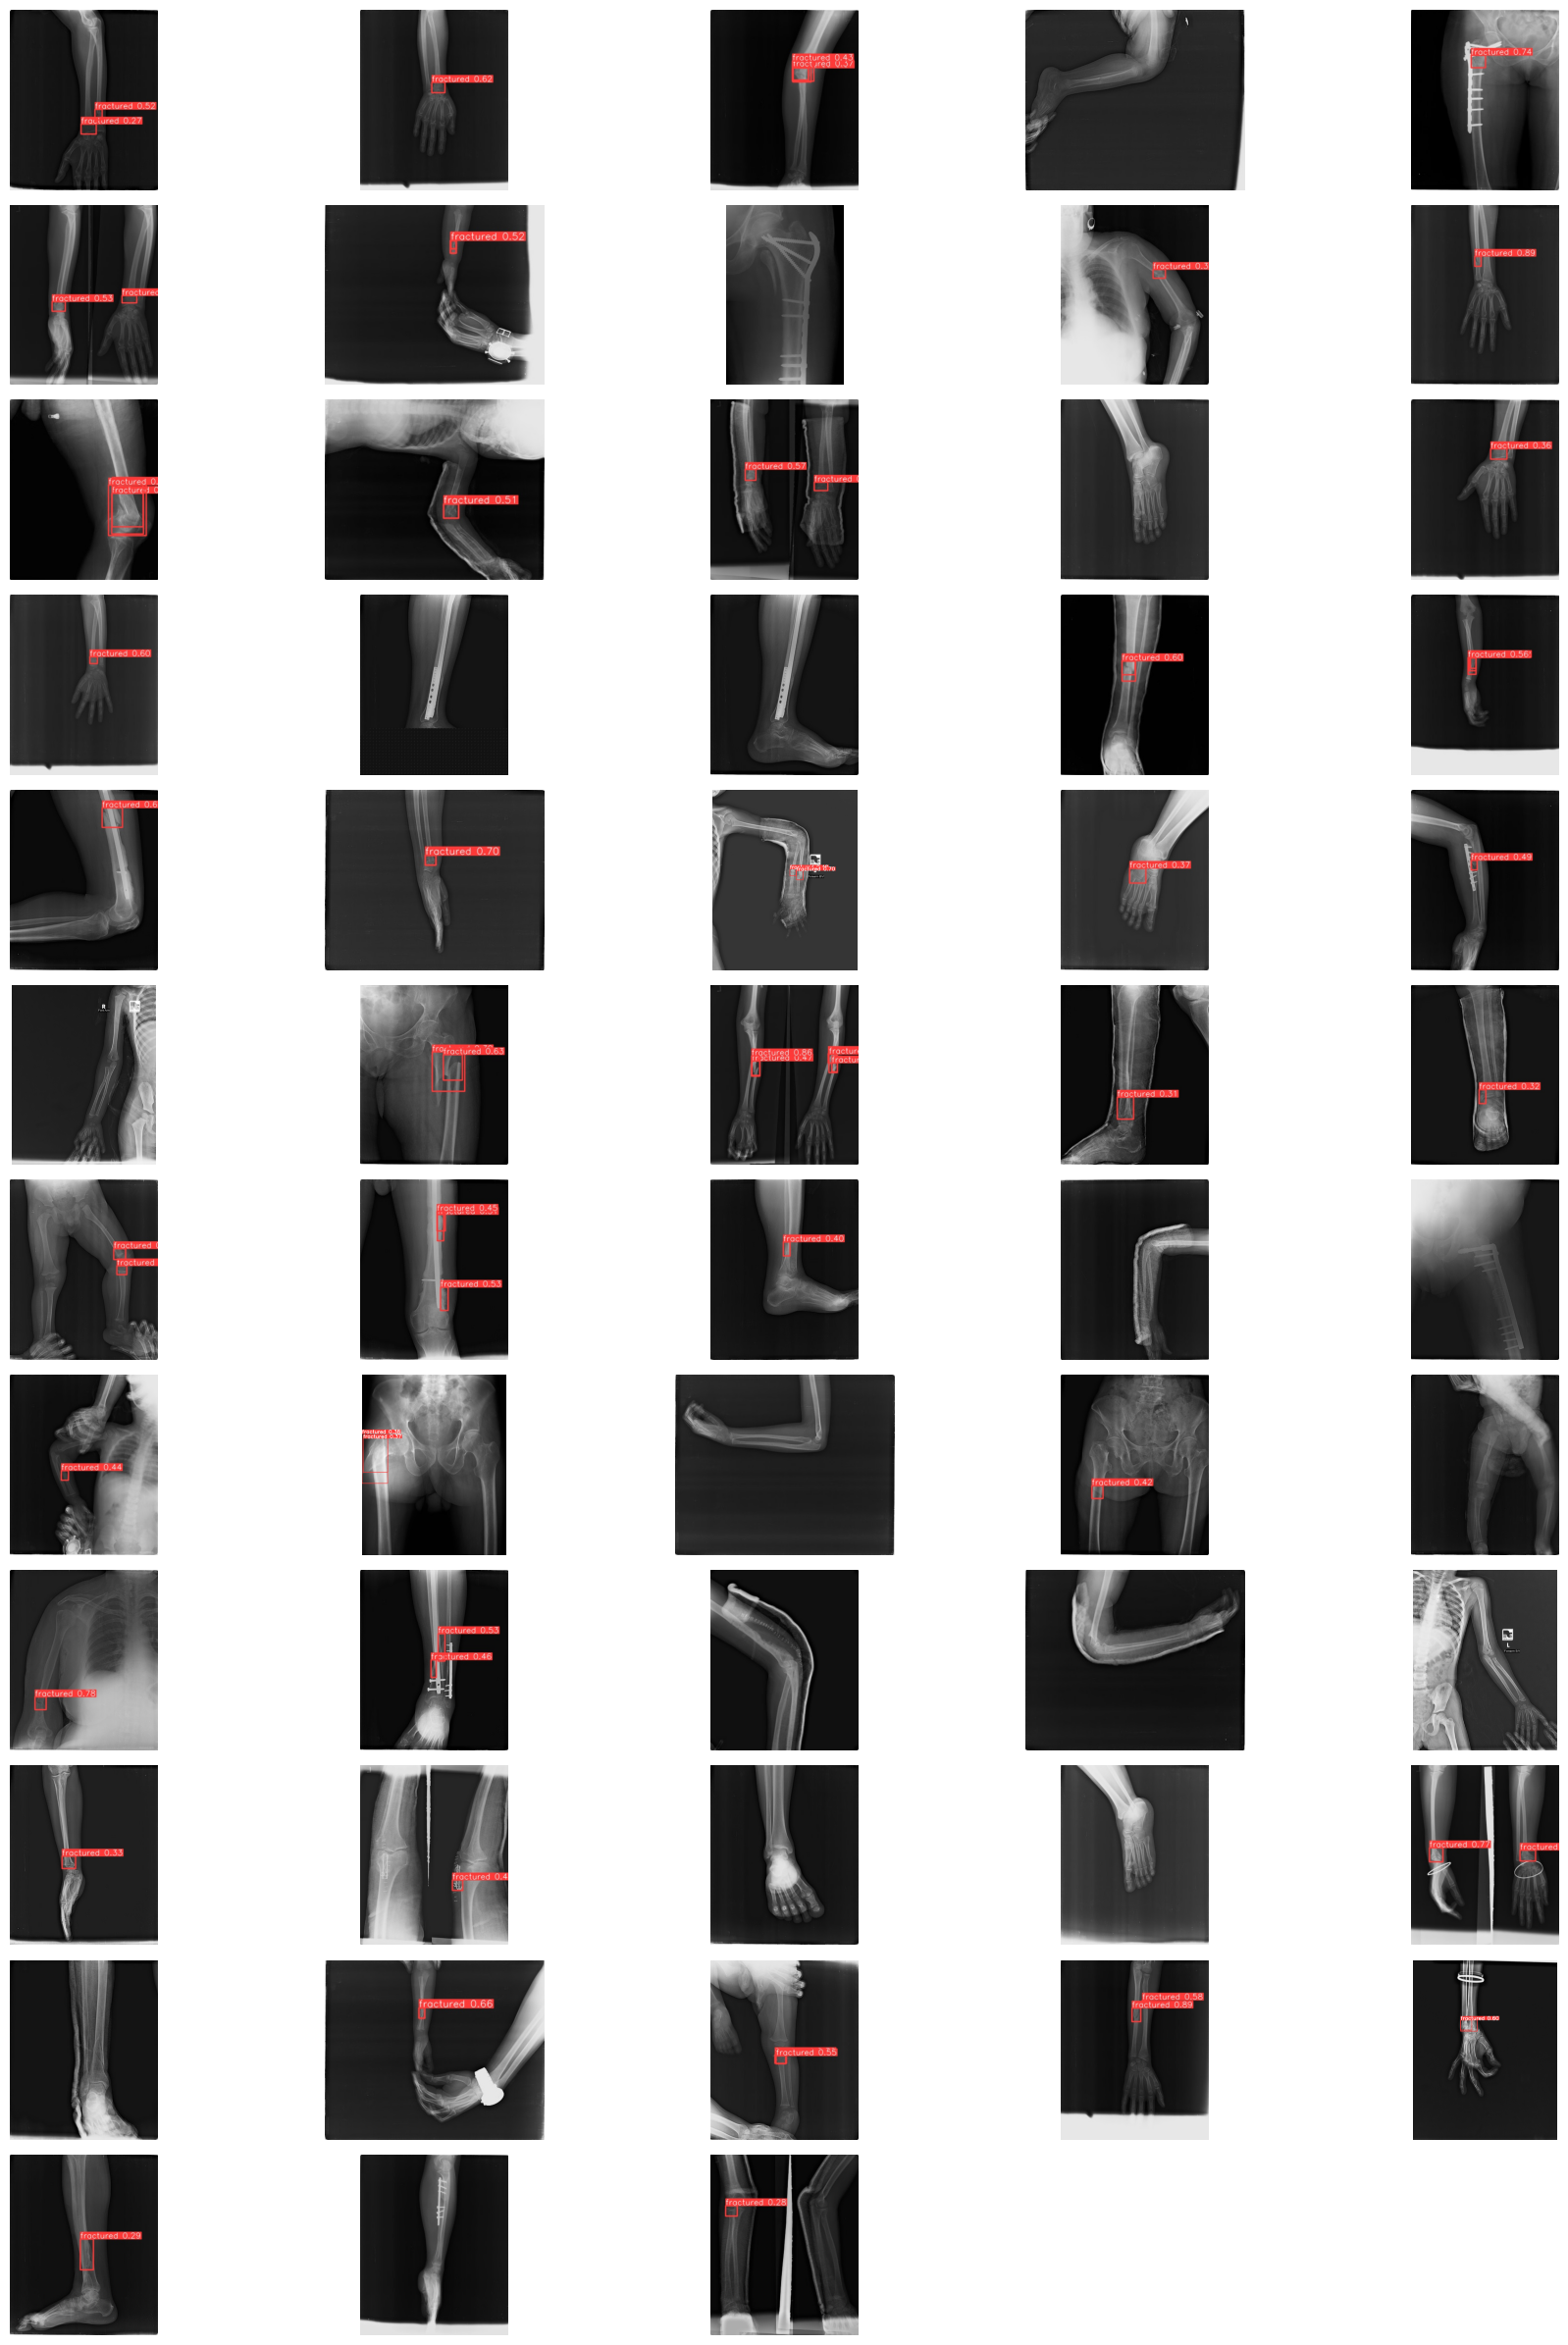

In [ ]:
import random

folder_path = '/content/runs/detect/predict'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate on test dataset

In [ ]:
!yolo task=detect mode=val save=True model='/content/runs/detect/train/weights/last.pt' data=/content/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs
val: Scanning /content/yolo/detect/labels/test... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<00:00, 1686.53it/s]
val: New cache created: /content/yolo/detect/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.07it/s]
                   all         58         73      0.613      0.452      0.485       0.17
Speed: 0.2ms preprocess, 34.4ms inference, 0.0ms loss, 15.1ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val save=True model='/content/runs/detect/train/weights/best.pt' data=/content/yolo/detect/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs
val: Scanning /content/yolo/detect/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.13it/s]
                   all         58         73      0.602      0.493      0.485      0.178
Speed: 0.2ms preprocess, 35.2ms inference, 0.0ms loss, 15.3ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


## SEGMENT

### Training Yolov9c segmentation

In [ ]:
!yolo task=segment mode=train model=yolov9c-seg.pt data=/content/yolo/segment/data.yaml epochs=50 imgsz=640

100% 53.9M/53.9M [00:00<00:00, 463MB/s]
WARNING ⚠️ yolov9c-seg.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.4s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/content/yolo/segment/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None,

### Validate on val dataset

In [ ]:
!yolo task=segment mode=val model='/content/runs/segment/train/weights/last.pt' data=/content/yolo/segment/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27625299 parameters, 0 gradients, 157.6 GFLOPs
val: Scanning /content/yolo/segment/labels/val.cache... 86 images, 0 backgrounds, 0 corrupt: 100% 86/86 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  83% 5/6 [00:08<00:01,  1.39s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:08<00:00,  1.44s/it]
            

In [ ]:
!yolo task=segment mode=val model='/content/runs/segment/train/weights/best.pt' data=/content/yolo/segment/data.yaml split = val

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27625299 parameters, 0 gradients, 157.6 GFLOPs
val: Scanning /content/yolo/segment/labels/val.cache... 86 images, 0 backgrounds, 0 corrupt: 100% 86/86 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  83% 5/6 [00:06<00:01,  1.11s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.09s/it]
            

### Inference on test dataset

In [ ]:
!yolo task=segment mode=predict  model='/content/runs/segment/train/weights/best.pt' conf=0.25 source="/content/yolo/segment/images/test"

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27625299 parameters, 0 gradients, 157.6 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/58 /content/yolo/segment/images/test/IMG0000142.jpg: 640x512 (no detections), 199.1ms
image 2/58 /content/yolo/segment/images/test/IMG0000207.jpg: 640x512 3 fractureds, 47.5ms
image 3/58 /content/yolo/segment/images/test/IMG0000454.jpg: 640x544 (no detections), 99.0ms
image 4/58 /content/yolo/segment/images/test/IMG0000480.jpg: 640x544 (no detections), 58.6ms
image 5/58 /content/yolo/segment/images/test/IMG0000671.jpg: 640x544 (no detections), 58.7ms
imag

### Plot results on test dataset

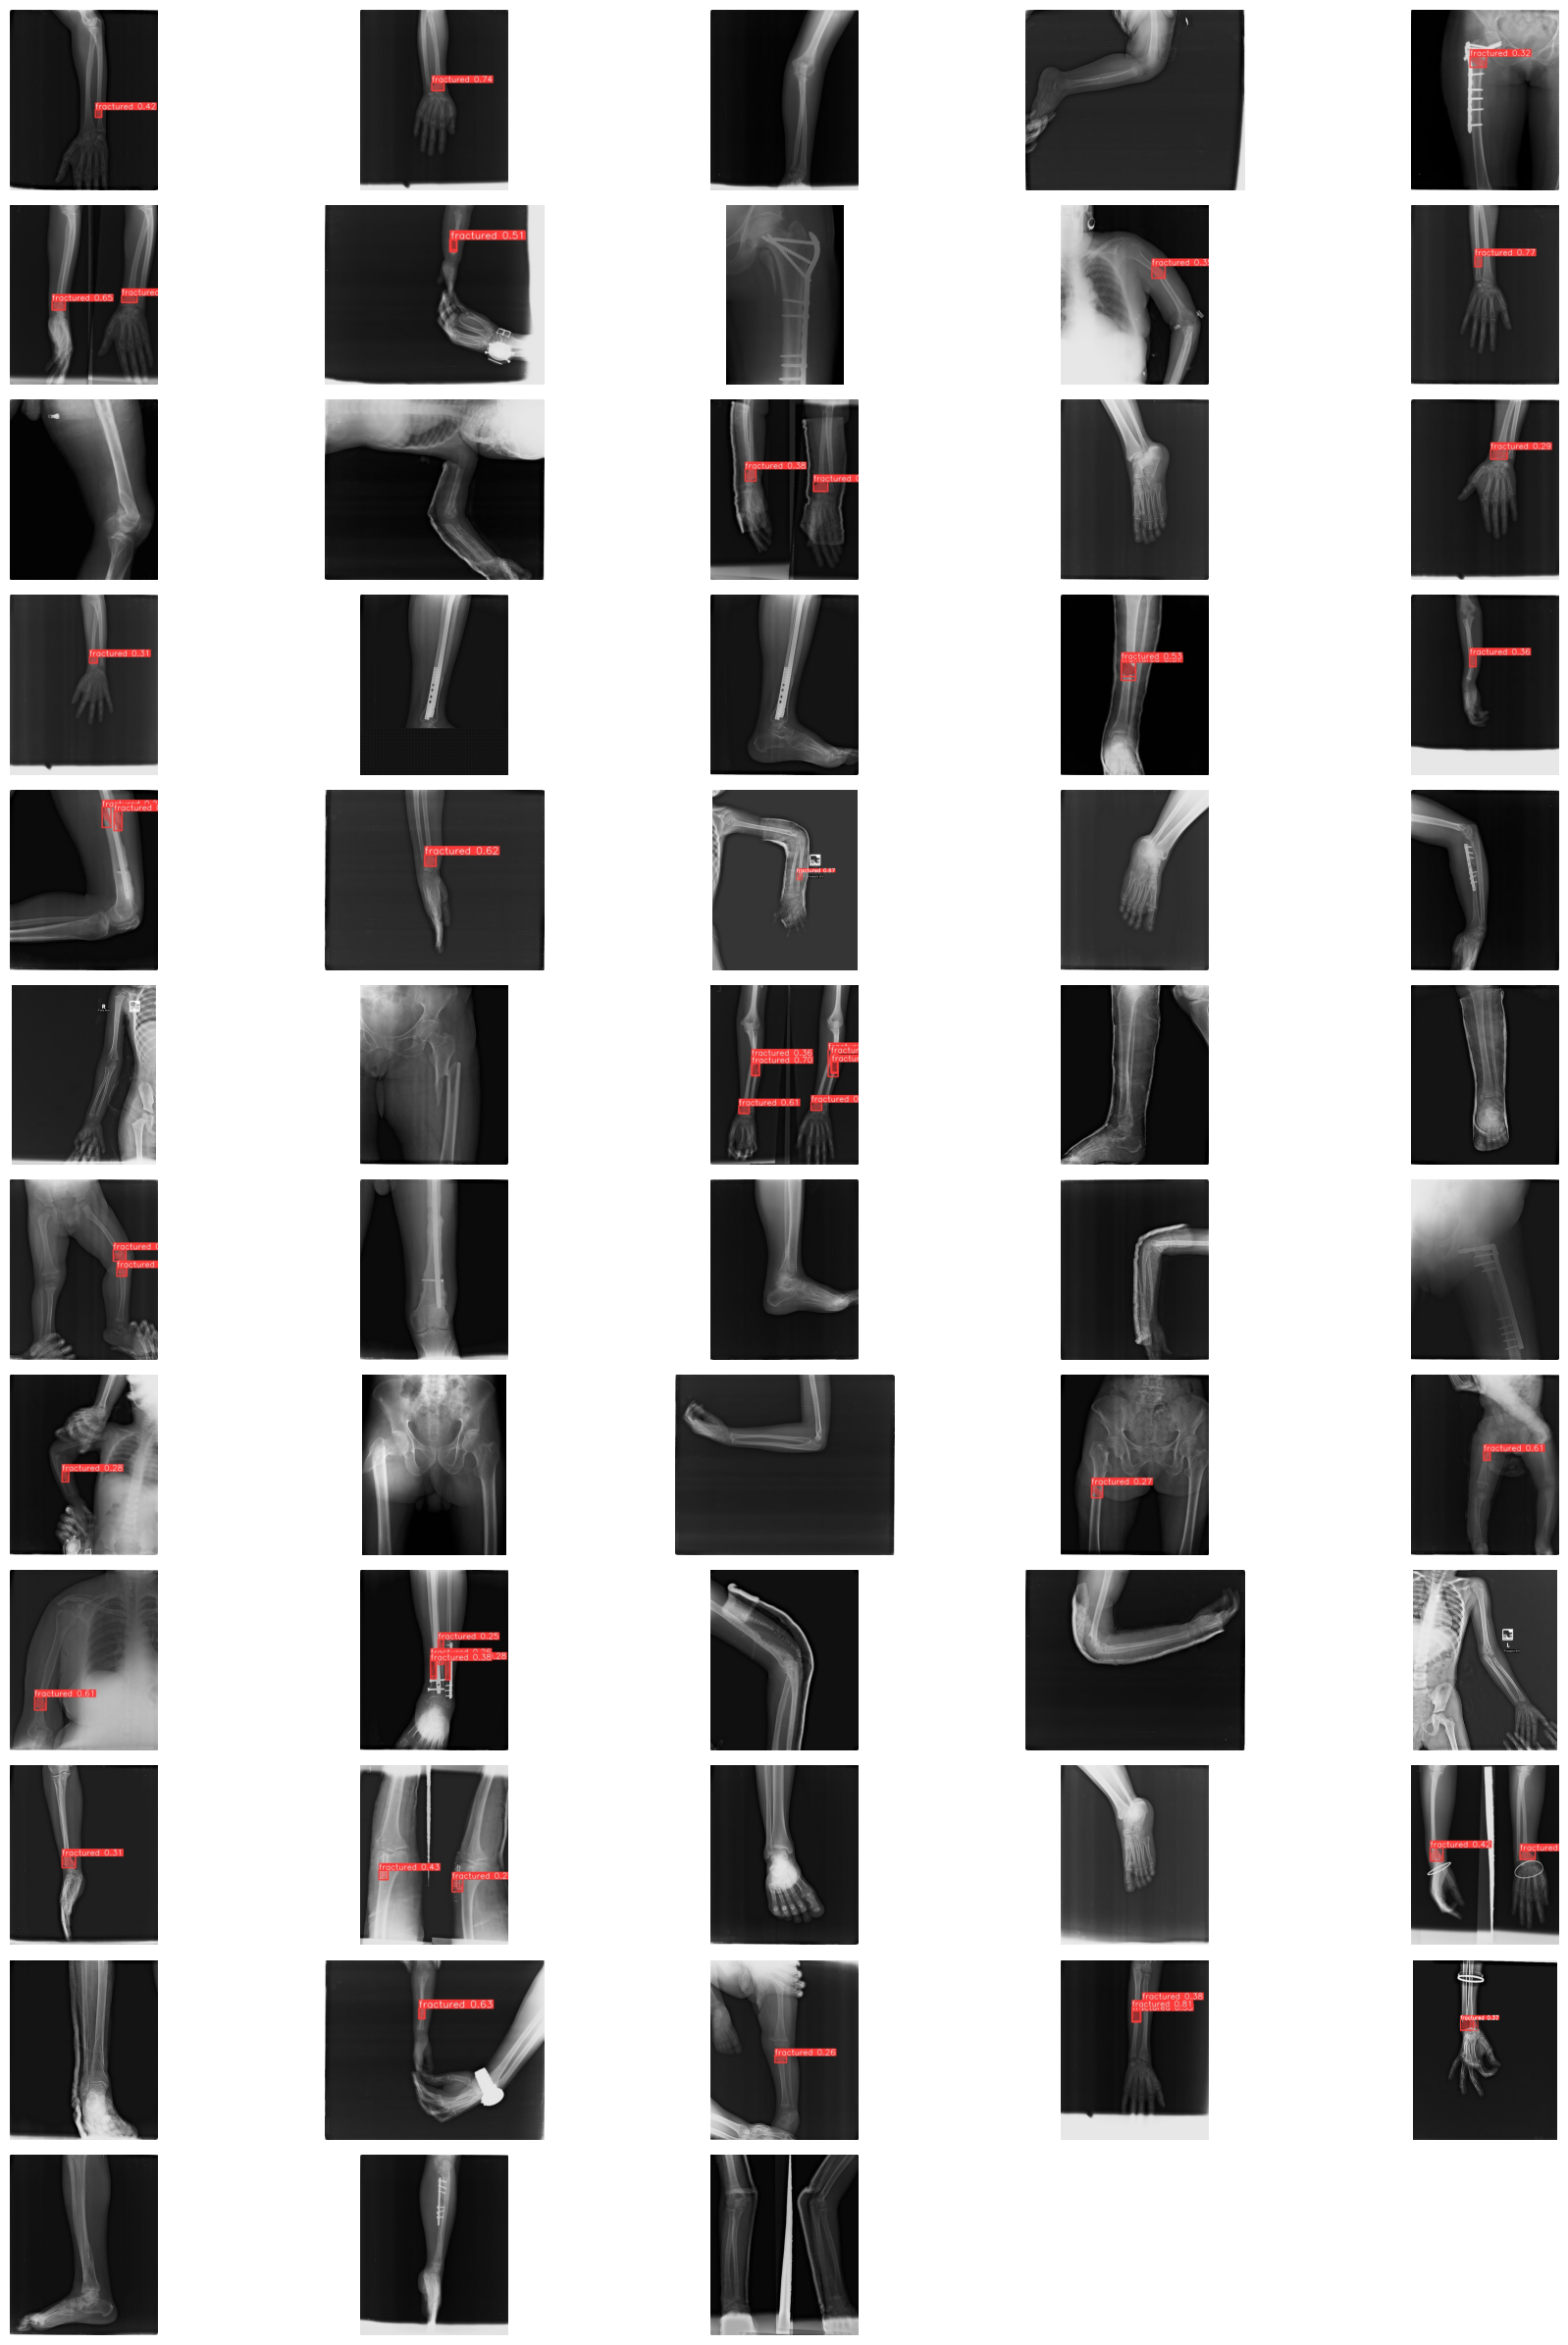

In [ ]:
folder_path = '/content/runs/segment/predict'

images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)
          if img.endswith(".jpg")]

# Calculate number of rows and columns for a 12-row grid
num_images = len(images)
num_rows = 12
num_cols = (num_images + num_rows - 1) // num_rows  # Integer division for full rows

# Create a figure with appropriate figsize for better visualization
plt.figure(figsize=(18, 24))  # Adjust width and height for desired layout

# Display images in a 12-row grid
for i, image_path in enumerate(images):
    img = mpimg.imread(image_path)

    # Calculate row and column indices for grid placement
    row = i // num_cols
    col = i % num_cols

    # Create a subplot and display the image
    plt.subplot(num_rows, num_cols, i + 1)  # Start subplot indexing from 1
    plt.imshow(img)

    plt.axis('off')

plt.tight_layout()

plt.show()


### Validate on test dataset

In [ ]:
!yolo task=segment mode=val model='/content/runs/segment/train/weights/last.pt' data=/content/yolo/segment/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27625299 parameters, 0 gradients, 157.6 GFLOPs
val: Scanning /content/yolo/segment/labels/test... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<00:00, 1518.18it/s]
val: New cache created: /content/yolo/segment/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.25s/it]
                   all         58         73      0.633      0.356      0.401      0.166      0.675       0.37      0.417      0.148
Speed: 4.4ms preprocess, 39.1ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to runs/segment/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=segment mode=val model='/content/runs/segment/train/weights/best.pt' data=/content/yolo/segment/data.yaml split = test

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27625299 parameters, 0 gradients, 157.6 GFLOPs
val: Scanning /content/yolo/segment/labels/test.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.44s/it]
                   all         58         73      0.581      0.384      0.395      0.174      0.618      0.411      0.426      0.145
Speed: 6.8ms preprocess, 42.0ms inference, 0.0ms loss, 20.9ms postprocess per image
Results saved to runs/segment/val4
💡 Learn more at https://docs.ultralytics.com/modes/val
